#1. Import de Bibliotecas:

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Desenvolvimento do Trabalho:


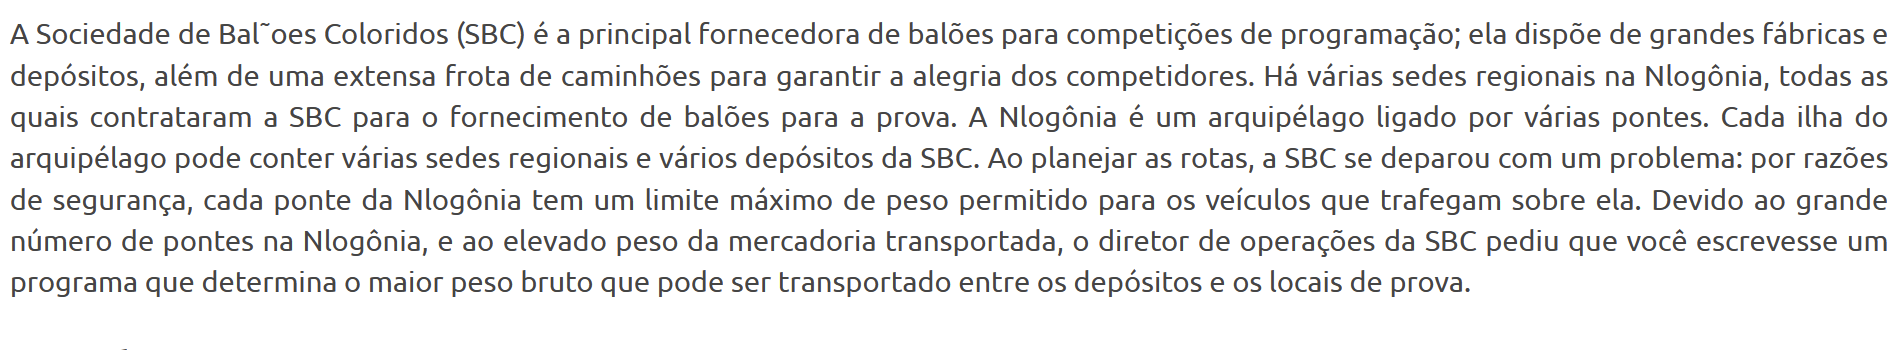


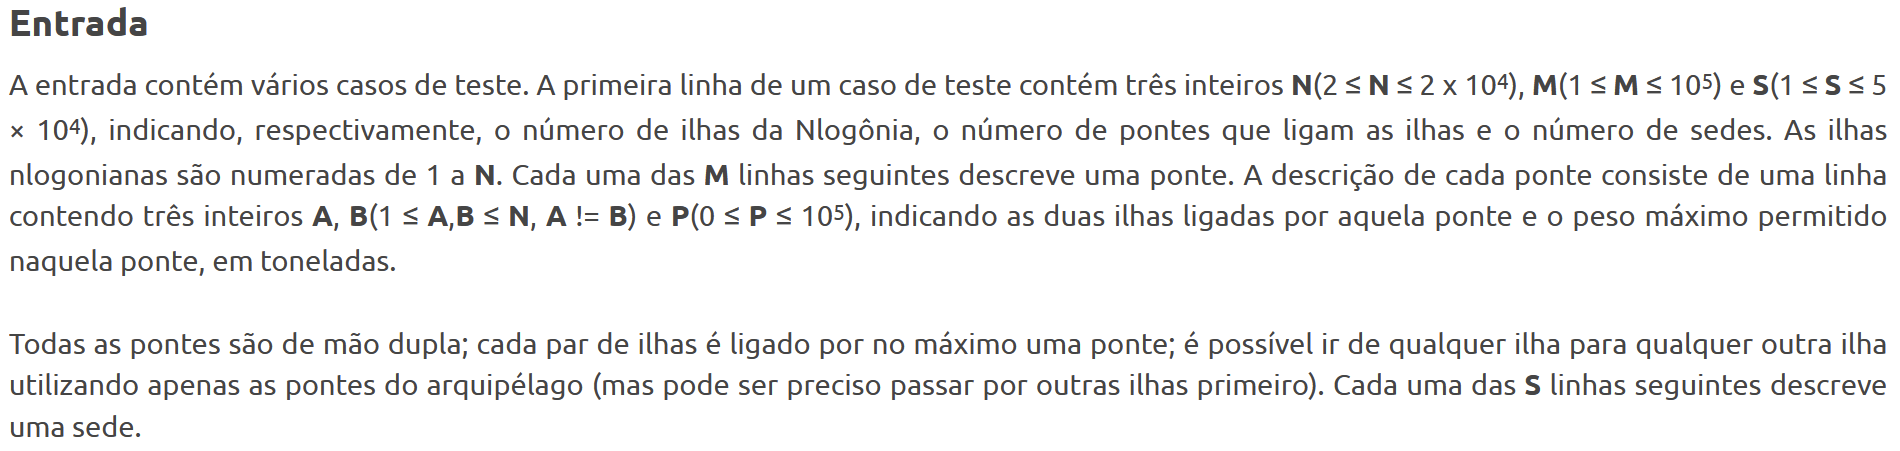

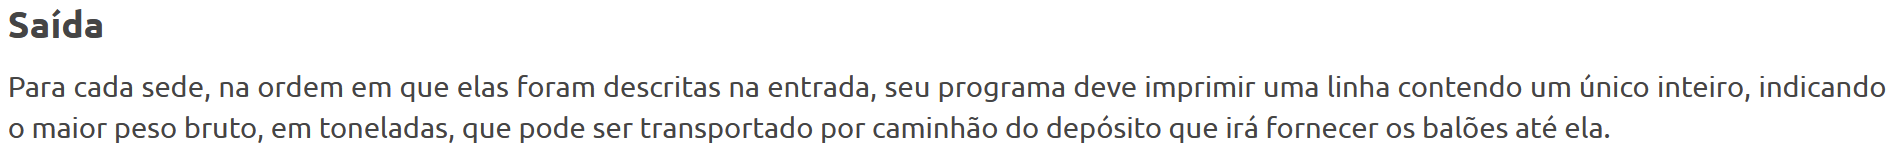

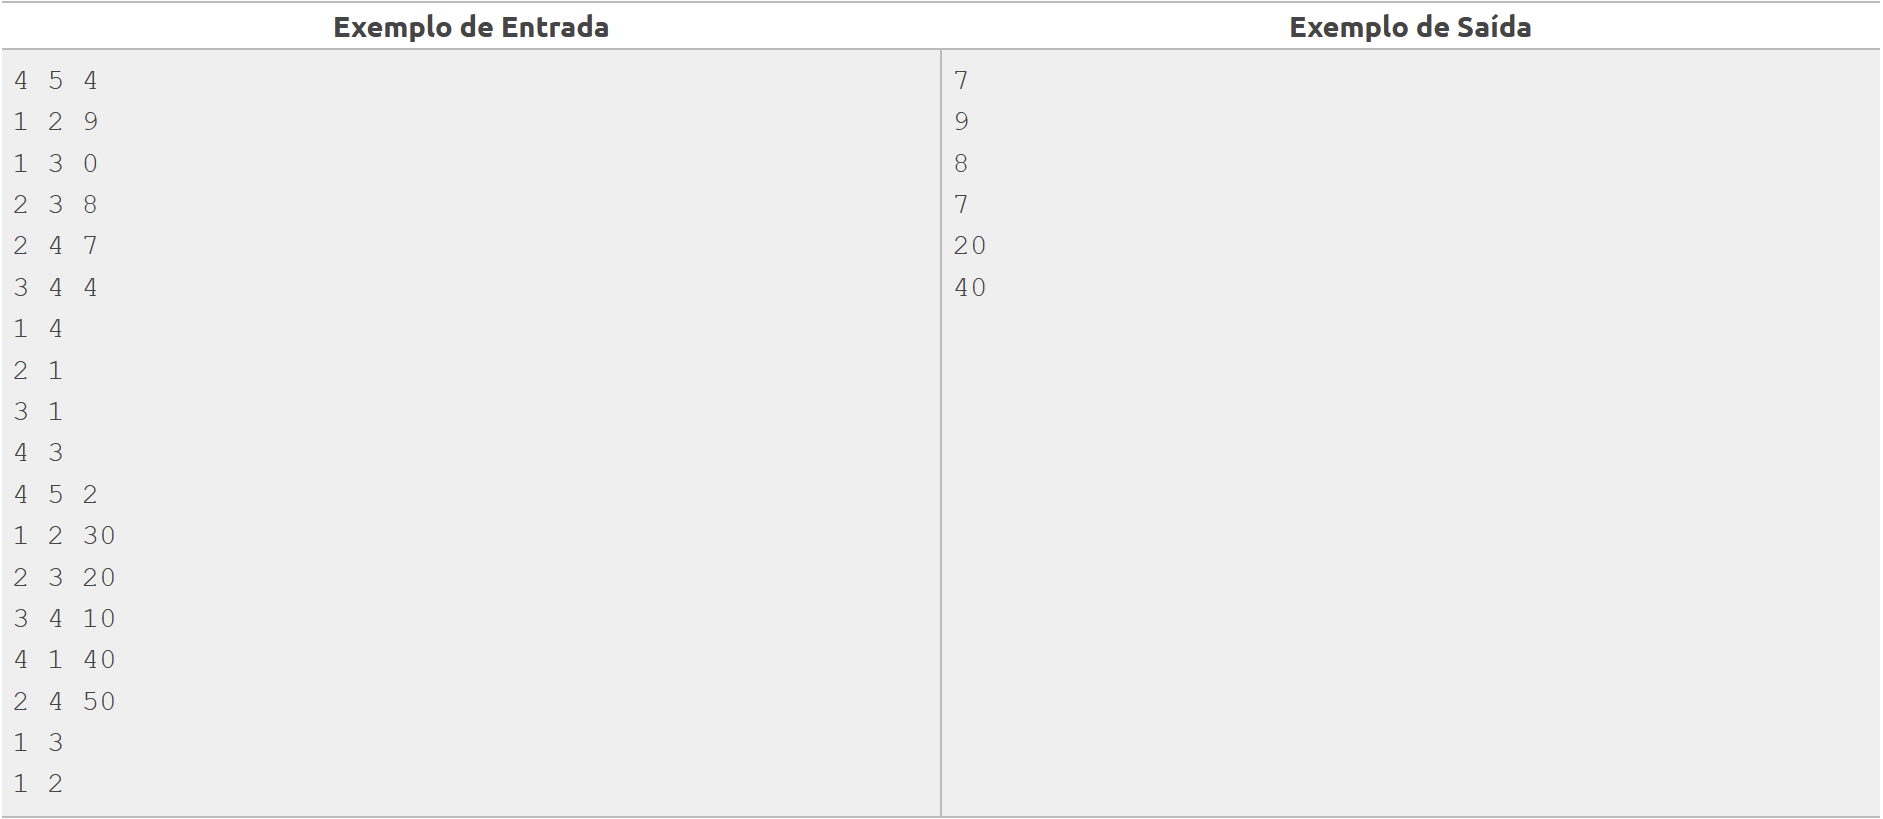

Primeira Linha: <p>
1º: Nº de Ilhas <p>
2º: Nº de Pontes <p>
3º: Sedes

Linha Ponte: <p>
1º: Origem <p>
2º: Destino <p>
3º: Peso máximo

Linha Sedes: <p>
1º: Início do Trajeto <p>
2º: Fim do Trajeto

In [43]:
matriz = [
    # Grafo 1
    [4, 4, 2],  # 4 ilhas, 4 pontes, 2 sedes
    [1, 2, 15],
    [2, 3, 25],
    [3, 4, 10],
    [1, 4, 30],
    [1, 3],
    [2, 4],

    # Grafo 2
    [3, 3, 1],  # 3 ilhas, 3 pontes, 1 sede
    [1, 2, 5],
    [2, 3, 20],
    [1, 3, 0],
    [1, 2],

    # Grafo 3
    [5, 6, 3],  # 5 ilhas, 6 pontes, 3 sedes
    [1, 2, 40],
    [2, 3, 15],
    [3, 4, 25],
    [4, 5, 10],
    [1, 5, 5],
    [2, 4, 30],
    [1, 4],
    [2, 5],
    [3, 1],

    # Grafo 4
    [4, 5, 2],  # 4 ilhas, 5 pontes, 2 sedes
    [1, 2, 12],
    [2, 3, 18],
    [3, 4, 22],
    [1, 3, 8],
    [2, 4, 35],
    [1, 4],
    [3, 2],

    # Grafo 5
    [6, 7, 4],  # 6 ilhas, 7 pontes, 4 sedes
    [1, 2, 45],
    [2, 3, 20],
    [3, 4, 15],
    [4, 5, 10],
    [5, 6, 25],
    [1, 3, 5],
    [2, 5, 30],
    [1, 6],
    [2, 4],
    [3, 5],
    [4, 1],

    # Grafo 6
    [3, 2, 1],  # 3 ilhas, 2 pontes, 1 sede
    [1, 2, 10],
    [2, 3, 15],
    [1, 3],

    # Grafo 7
    [5, 5, 2],  # 5 ilhas, 5 pontes, 2 sedes
    [1, 2, 20],
    [2, 3, 25],
    [3, 4, 30],
    [4, 5, 15],
    [1, 4, 10],
    [1, 5],
    [3, 2],

    # Grafo 8
    [4, 4, 3],  # 4 ilhas, 4 pontes, 3 sedes
    [1, 2, 5],
    [2, 3, 40],
    [3, 4, 20],
    [1, 4, 15],
    [1, 3],
    [2, 4],
    [4, 1],

    # Grafo 9
    [6, 8, 2],  # 6 ilhas, 8 pontes, 2 sedes
    [1, 2, 10],
    [2, 3, 20],
    [3, 4, 30],
    [4, 5, 40],
    [5, 6, 50],
    [1, 3, 15],
    [2, 4, 25],
    [3, 5, 35],
    [1, 6],
    [3, 4],

    # Grafo 10
    [5, 6, 1],  # 5 ilhas, 6 pontes, 1 sede
    [1, 2, 25],
    [2, 3, 30],
    [3, 4, 15],
    [4, 5, 20],
    [1, 4, 10],
    [2, 5, 5],
    [1, 3]
]

In [51]:
matriz = []
with open("/content/drive/MyDrive/Arquivos/Caminhao/Input1.txt", "r") as file:
    for line in file:
      if line == "\n":
        continue
      else:
        numeros = list(map(int, line.strip().split()))
        matriz.append(numeros)

#matriz[-1] = [3, 2]

print(matriz)

[[4, 5, 4], [1, 2, 9], [1, 3, 0], [2, 3, 8], [2, 4, 7], [3, 4, 4], [1, 4], [2, 1], [3, 1], [4, 3], [4, 5, 2], [1, 2, 30], [2, 3, 20], [3, 4, 10], [4, 1, 40], [2, 4, 50], [1, 3], [1, 2]]


In [74]:
# Função para encontrar o caminho com maior peso
def caminho_maior_peso(grafo, inicio, fim):
    # Inicializar os pesos máximos e os caminhos
    pesos = {no: float('-inf') for no in grafo.nodes}
    pesos[inicio] = float('inf')  # Peso inicial é infinito para maximizar
    caminho = {no: [] for no in grafo.nodes}
    caminho[inicio] = [inicio]
    print(pesos)

    # Fila de prioridade (usaremos uma abordagem simples)
    visitados = set()
    nos = set(grafo.nodes)

    while nos:
        # Escolher o nó com maior peso acumulado
        no_atual = max((no for no in nos if no not in visitados),
                       key=lambda x: pesos[x], default=None)
        if no_atual is None:
            break

        visitados.add(no_atual)
        nos.remove(no_atual)

        # Para cada vizinho do nó atual
        for vizinho in grafo.neighbors(no_atual):
            if vizinho in visitados:
                continue

            # Peso da aresta
            peso_aresta = grafo[no_atual][vizinho]['weight']
            # Peso do caminho até o vizinho é o mínimo entre o peso acumulado e o peso da aresta
            peso_caminho = min(pesos[no_atual], peso_aresta)

            if peso_caminho > pesos[vizinho]:
                pesos[vizinho] = peso_caminho
                caminho[vizinho] = caminho[no_atual] + [vizinho]

    return caminho[fim], pesos[fim]

# Função para processar a matriz e separar os grafos
def processar_matriz(matriz):
    grafos = []
    i = 0
    while i < len(matriz):
        # Extrair informações do grafo atual
        num_ilhas, num_pontes, num_sedes = matriz[i]
        grafo_info = {
            "num_ilhas": num_ilhas,
            "num_pontes": num_pontes,
            "num_sedes": num_sedes,
            "pontes": [],
            "sedes": []
        }

        # Extrair as pontes
        for j in range(i + 1, i + 1 + num_pontes):
            grafo_info["pontes"].append(matriz[j])

        # Extrair as sedes
        for j in range(i + 1 + num_pontes, i + 1 + num_pontes + num_sedes):
            grafo_info["sedes"].append(matriz[j])

        grafos.append(grafo_info)
        i += 1 + num_pontes + num_sedes

    return grafos

# Função para plotar o grafo e destacar o caminho
def plotar_grafo(grafo, caminho, inicio, fim, grafo_idx, trajeto_idx):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(grafo)

    # Desenhar o grafo
    # Arestas normais (em preto)
    nx.draw_networkx_edges(grafo, pos, edge_color='black', width=2)

    # Arestas do caminho destacado (em vermelho)
    if caminho:
        caminho_arestas = [(caminho[i], caminho[i+1]) for i in range(len(caminho)-1)]
        nx.draw_networkx_edges(grafo, pos, edgelist=caminho_arestas, edge_color='red', width=3)

    # Desenhar os nós
    nx.draw_networkx_nodes(grafo, pos, node_color='yellow', node_size=700)
    nx.draw_networkx_labels(grafo, pos, font_size=15, font_weight='bold')

    # Desenhar os pesos das arestas
    edge_labels = nx.get_edge_attributes(grafo, 'weight')
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels, font_size=12)

    # Título do gráfico
    plt.title(f"Grafo {grafo_idx} - Trajeto de {inicio} para {fim}")
    plt.axis('off')
    plt.show()

# Função para processar um grafo e calcular os caminhos
def processar_grafo(grafo_info, grafo_idx):
    num_ilhas = grafo_info["num_ilhas"]
    num_pontes = grafo_info["num_pontes"]
    num_sedes = grafo_info["num_sedes"]
    pontes = grafo_info["pontes"]
    sedes = grafo_info["sedes"]

    # Criar o grafo com NetworkX
    G = nx.Graph()
    # Adicionar nós (ilhas)
    for i in range(1, num_ilhas + 1):
        G.add_node(i)

    # Adicionar arestas (pontes) com pesos
    for origem, destino, peso in pontes:
        G.add_edge(origem, destino, weight=peso)

    # Calcular o caminho com maior peso para cada trajeto
    resultados = []
    for idx, (inicio, fim) in enumerate(sedes, 1):
        caminho, peso = caminho_maior_peso(G, inicio, fim)
        resultados.append({
            "inicio": inicio,
            "fim": fim,
            "caminho": caminho,
            "peso": peso
        })

        # Plotar o grafo com o caminho destacado
        plotar_grafo(G, caminho, inicio, fim, grafo_idx, idx)

    return resultados


Resultados para o Grafo 1:
{1: inf, 2: -inf, 3: -inf, 4: -inf}


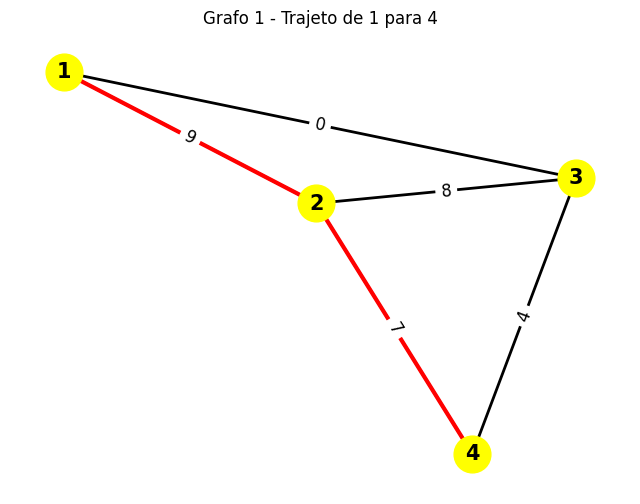

{1: -inf, 2: inf, 3: -inf, 4: -inf}


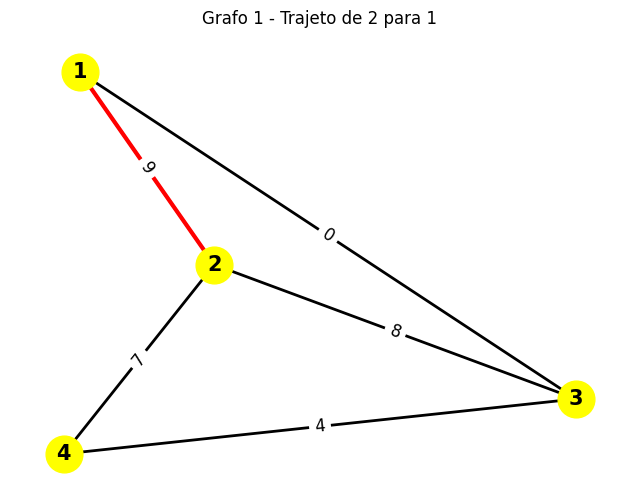

{1: -inf, 2: -inf, 3: inf, 4: -inf}


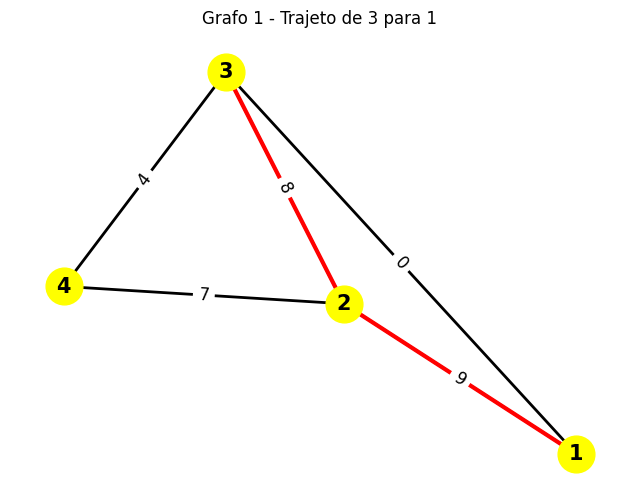

{1: -inf, 2: -inf, 3: -inf, 4: inf}


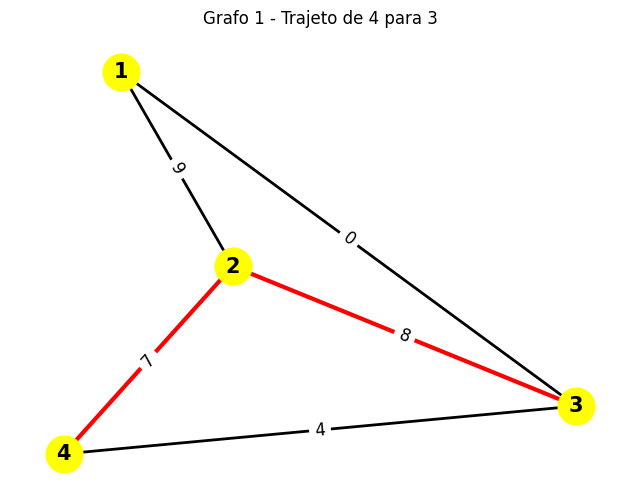

Trajeto de 1 para 4:
Caminho: [1, 2, 4]
Peso máximo: 7

Trajeto de 2 para 1:
Caminho: [2, 1]
Peso máximo: 9

Trajeto de 3 para 1:
Caminho: [3, 2, 1]
Peso máximo: 8

Trajeto de 4 para 3:
Caminho: [4, 2, 3]
Peso máximo: 7


Resultados para o Grafo 2:
{1: inf, 2: -inf, 3: -inf, 4: -inf}


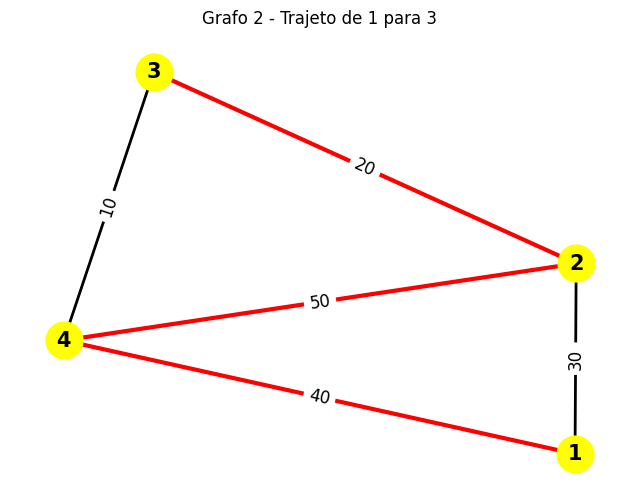

{1: inf, 2: -inf, 3: -inf, 4: -inf}


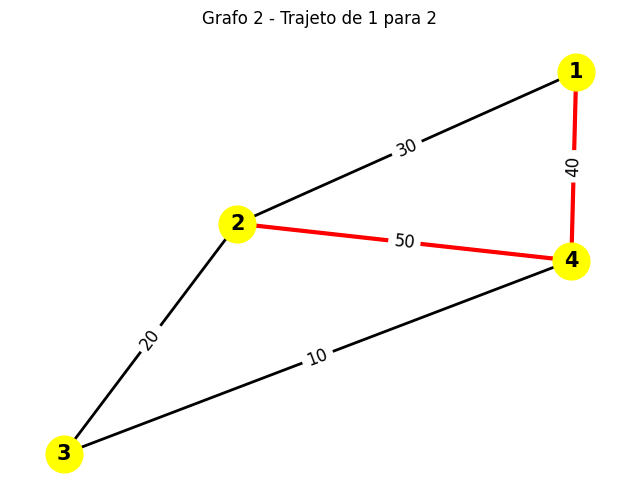

Trajeto de 1 para 3:
Caminho: [1, 4, 2, 3]
Peso máximo: 20

Trajeto de 1 para 2:
Caminho: [1, 4, 2]
Peso máximo: 40



In [75]:
# Passo 1: Separar os grafos
grafos = processar_matriz(matriz)

# Passo 2: Processar cada grafo e calcular os caminhos
for idx, grafo_info in enumerate(grafos, 1):
    print(f"\nResultados para o Grafo {idx}:")
    resultados = processar_grafo(grafo_info, idx)

    for resultado in resultados:
        print(f"Trajeto de {resultado['inicio']} para {resultado['fim']}:")
        print(f"Caminho: {resultado['caminho']}")
        print(f"Peso máximo: {resultado['peso']}")
        print()